<a href="https://colab.research.google.com/github/stevengregori92/Learn-XGBoost/blob/main/Magic_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366830 sha256=1a24caa0e0b33b556c50d2872ba135f03b2b718e607893a61e58ca34d6f8410f
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=9a42a3691deb96e408f9d75db8c83b40742acaa2e879c0836e4817a63c1b7977
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

#Import Dataset

In [3]:
!gdown https://drive.google.com/uc?id=1ckxO5MRqy0p3C0hlV6J904sFM8gZnc1H

Downloading...
From: https://drive.google.com/uc?id=1ckxO5MRqy0p3C0hlV6J904sFM8gZnc1H
To: /content/magic.zip
100% 735k/735k [00:00<00:00, 94.5MB/s]


In [4]:
!unzip /content/magic.zip

Archive:  /content/magic.zip
  inflating: MagicTelescope.csv      


In [5]:
df = pd.read_csv('MagicTelescope.csv', index_col='ID')
df

,id,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
ID,,,,,,,,,,,,
1,1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
2,2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
3,3,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
4,4,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
5,5,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...,...
19016,19016,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19017,19017,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19018,19018,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h


In [7]:
df['class:'].value_counts()

g    12332
h     6688
Name: class:, dtype: int64

#Cleaning Dataset

,missing_value,%
id,0,0.0
fLength:,0,0.0
fWidth:,0,0.0
fSize:,0,0.0
fConc:,0,0.0
fConc1:,0,0.0
fAsym:,0,0.0
fM3Long:,0,0.0
fM3Trans:,0,0.0
fAlpha:,0,0.0


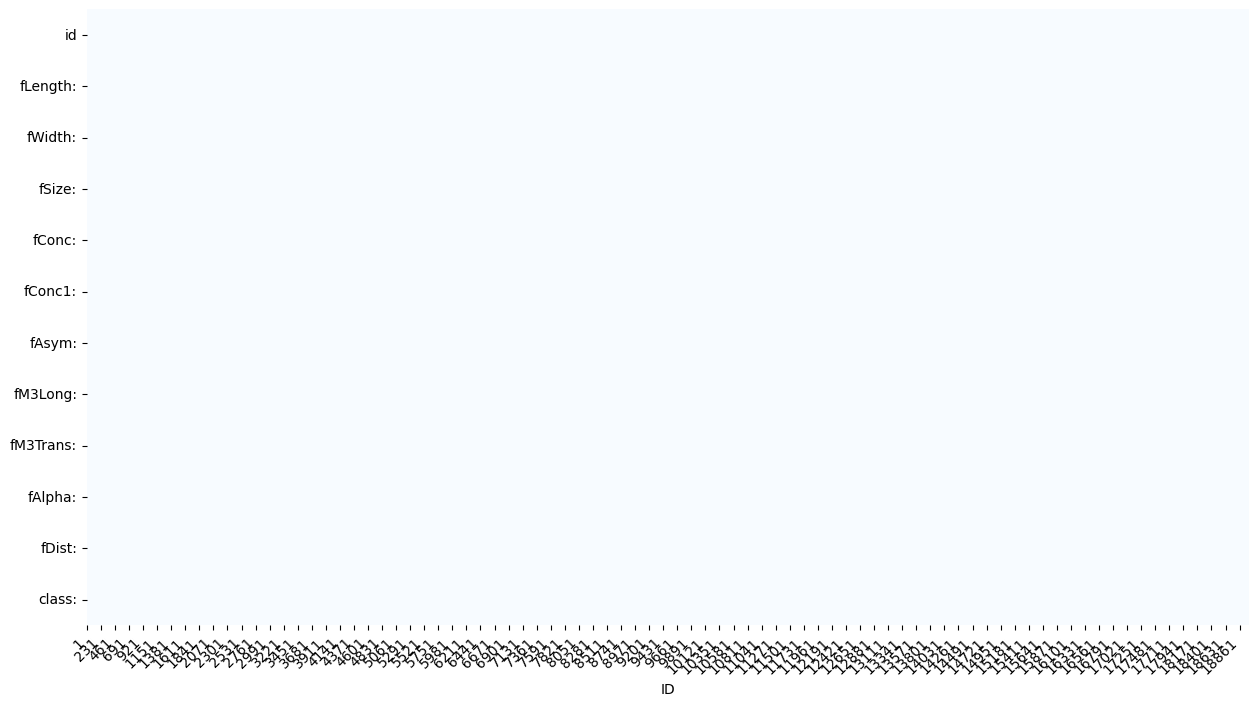

In [8]:
plot_missing_value(df, return_df=True)

In [9]:
df.drop(columns='id', inplace=True)

In [11]:
df['class:'] = df['class:'].replace(['g', 'h'], [0,1])

#Dataset Splitting

In [12]:
X = df.drop(columns=['class:'])
y = df['class:']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15216, 10), (3804, 10), (15216,), (3804,))

#SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

In [15]:
sm = SMOTE(random_state=42,sampling_strategy='auto')
X_train, y_train = sm.fit_resample(X, y)

#PCA

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA().fit(X_train)

Text(0, 0.5, 'Cumulative Explained Variance')

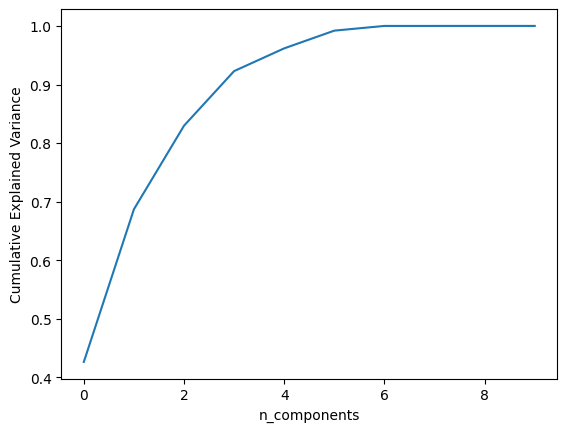

In [18]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')

#Training

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [26]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca', PCA(n_components=6, whiten=True)),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_poly_params, cv=3, n_iter = 50, n_jobs=-1, verbose=1, random_state = 42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.6914001956501502, 'algo__gamma': 5, 'algo__learning_rate': 0.16727902653067211, 'algo__max_depth': 7, 'algo__n_estimators': 166, 'algo__reg_alpha': 0.009793184984206244, 'algo__reg_lambda': 0.02653937643936054, 'algo__subsample': 0.6789230552321847, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.8846091469348037 0.8057494618801755 0.8995793901156677


,feature,importance,stdev
8,fAlpha:,0.254760,0.001771
9,fDist:,0.115480,0.001868
0,fLength:,0.114329,0.001494
6,fM3Long:,0.089264,0.000832
5,fAsym:,0.088696,0.001818
7,fM3Trans:,0.059544,0.001092
1,fWidth:,0.038761,0.000468
2,fSize:,0.000560,0.000094
3,fConc:,0.000122,0.000026
4,fConc1:,0.000065,0.000032


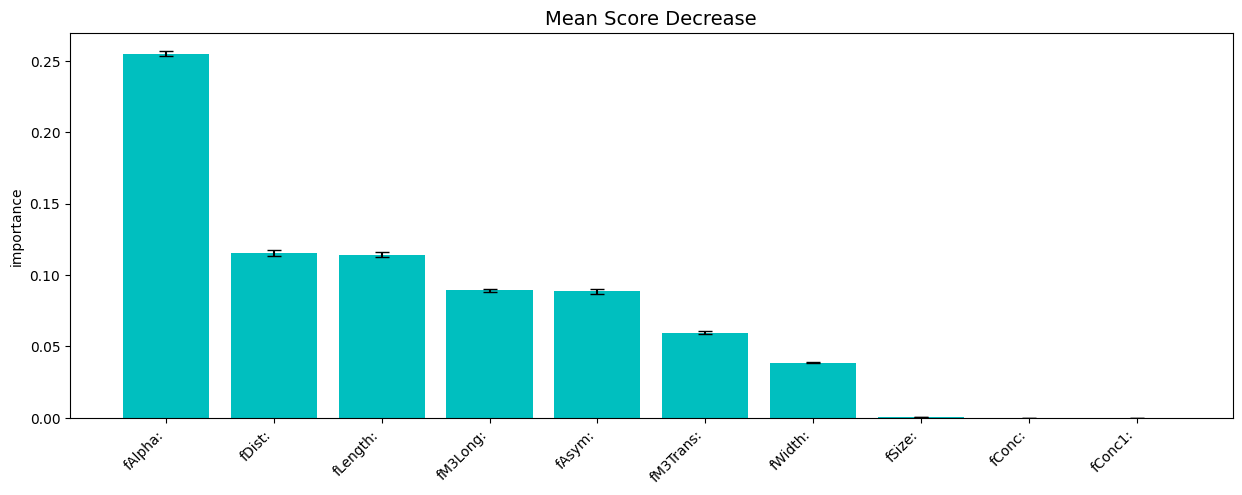

In [21]:
mean_score_decrease(X_train, y_train, model, plot=True, topk=50)

#Confusion Matrix

In [27]:
from jcopml.plot import plot_confusion_matrix

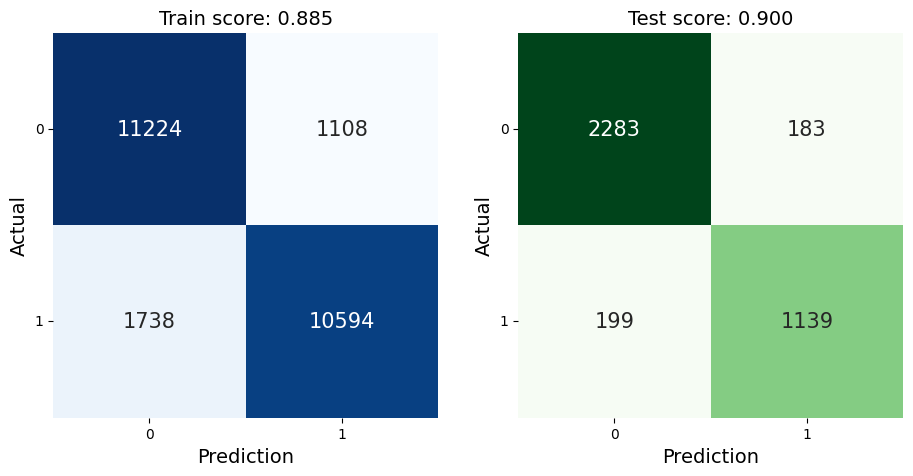

In [28]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [29]:
from jcopml.plot import plot_classification_report

In [30]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report= True)

Train report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12332
           1       0.91      0.86      0.88     12332

    accuracy                           0.88     24664
   macro avg       0.89      0.88      0.88     24664
weighted avg       0.89      0.88      0.88     24664


Test report
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2466
           1       0.86      0.85      0.86      1338

    accuracy                           0.90      3804
   macro avg       0.89      0.89      0.89      3804
weighted avg       0.90      0.90      0.90      3804

